In [1]:
# run the following command to install all the dependencies for the model
# pip install -r requirements.txt

### Heart Disease Data Dictionary

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import pickle

#### -> importing and exploring data

In [2]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

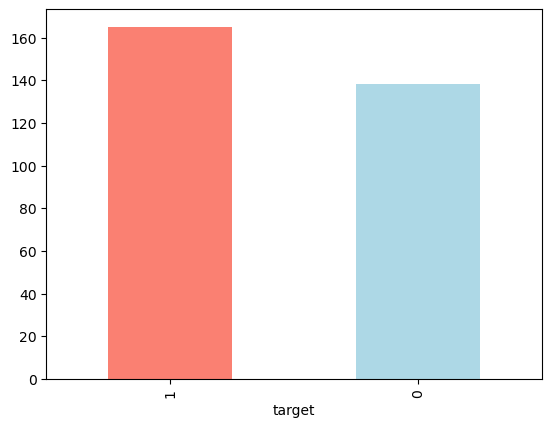

In [4]:
heart_disease["target"].value_counts().plot(kind="bar", 
                                            color=["salmon", "lightblue"]);

In [5]:
heart_disease.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# checking are there any missing values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Heart Disease Frequency according to Gender
pd.crosstab(heart_disease.sex, heart_disease.target)

target,0,1
sex,,
0,24,72
1,114,93


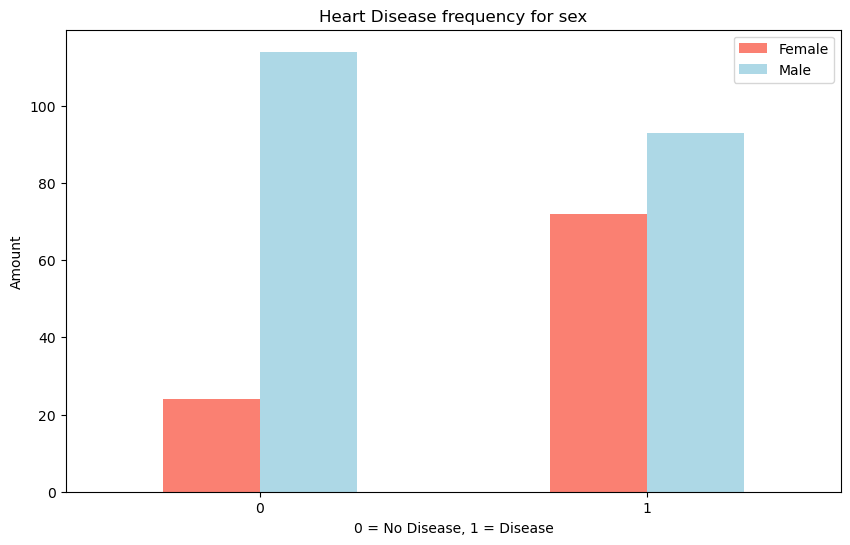

In [9]:
# visualising
pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind="bar",
                                                          figsize=(10,6),
                                                          color=["salmon","lightblue"]);
plt.title("Heart Disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation = 0);

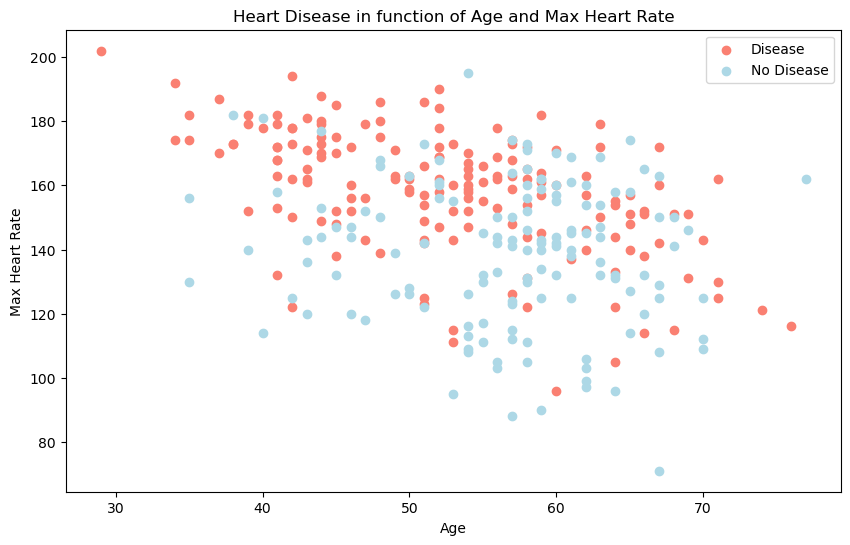

In [10]:
# Age vs Max Heart rate for Heart Disease
plt.figure(figsize=(10, 6))
# Scatter with positive examples
plt.scatter(heart_disease.age[heart_disease.target == 1],
            heart_disease.thalach[heart_disease.target == 1],
            c = "salmon");
# Scatter with negative examples
plt.scatter(heart_disease.age[heart_disease.target == 0],
            heart_disease.thalach[heart_disease.target == 0],
            c = "lightblue")
# adding helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

In [11]:
#  Heart Disease Frequency per Chest Pain Type
pd.crosstab(heart_disease.cp, heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


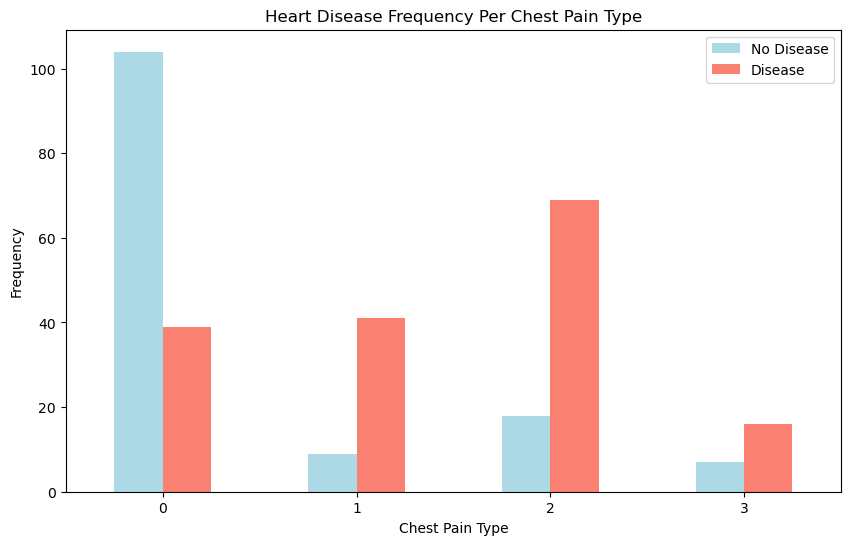

In [12]:
# visualising
pd.crosstab(heart_disease.cp, heart_disease.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [13]:
# Correlation between independent variables
corr_matrix = heart_disease.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


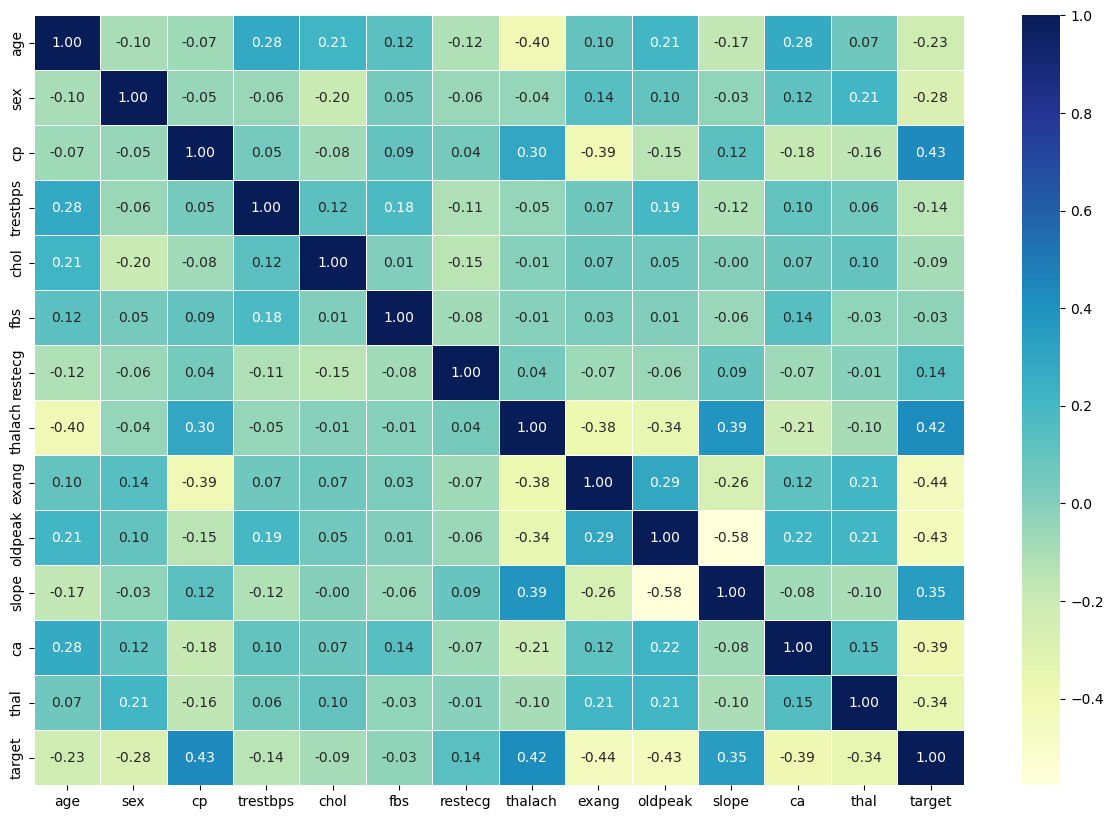

In [14]:
# visualizing correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = "YlGnBu")

#### -> shuffling dataframe

In [15]:
heart_disease_shuffled = heart_disease.sample(frac=1)

#### -> separating X and y labels

In [16]:
X = heart_disease_shuffled.drop(["target"], axis=1)
y = heart_disease_shuffled["target"]

#### -> splitting data into train, valid and test split

In [17]:
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

In [18]:
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

#### ->fitting the model

In [19]:
# baseline model (model 1)
np.random.seed(42)
clf = RandomForestClassifier()

In [20]:
clf.fit(X_train, y_train);

#### -> evaluating training data

In [21]:
clf.score(X_train, y_train)

1.0

#### -> evaluating test data

In [22]:
# accuracy
clf.score(X_test, y_test)

0.8695652173913043

#### -> Improving the model 
(by hand)

In [23]:
#viewing hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [24]:
# method 1 (setting one value for a hyperparameter)
# np.random.seed(42)
# clf_2 = RandomForestClassifier(n_estimators=200)
# clf_2.fit(X_train, y_train)
# y2_preds = clf_2.predict(X_valid)
# accuracy_score(y_valid, y2_preds)

In [25]:
# method 2  (setting a range of values for a hyperparameter)
# (model 2)
train_scores=[]
test_scores=[]

estimators = range(180, 340)

np.random.seed(42)

clf_2 = RandomForestClassifier()

for i in estimators:
    clf_2.set_params(n_estimators=i)
    clf_2.fit(X_train, y_train)
    train_scores.append(clf_2.score(X_train, y_train))
    test_scores.append(clf_2.score(X_test, y_test))

In [26]:
train_scores

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [27]:
test_scores

[0.8913043478260869,
 0.8913043478260869,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695,
 0.9130434782608695,
 0.8695652173913043,
 0.9130434782608695,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.9130434782608695,
 0.8913043478260869,
 0.8695652173913043,
 0.8913043478260869,
 0.8913043478260869,
 0.9130434782608695,
 0.8913043478260869,
 0.8695652173913043,
 0.9130434782608695,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.9130434782608695,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8695652173913043,
 0.8913043478260869,
 0.8913043478260869,
 0.9130434782608695,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8695652173913043,
 0.8913043478260869,
 0.8913043478

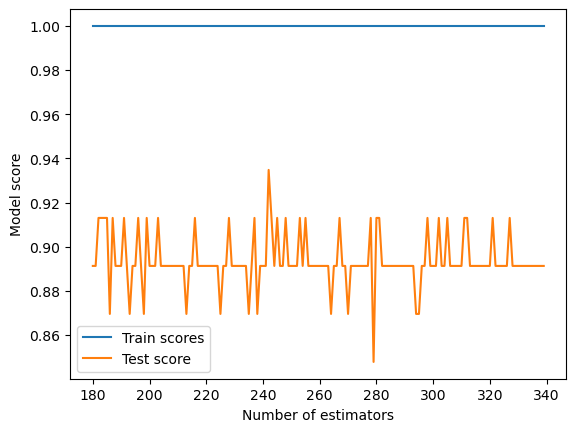

In [28]:
plt.plot(estimators, train_scores, label="Train scores")
plt.plot(estimators, test_scores, label="Test score")
plt.xlabel("Number of estimators")
plt.ylabel("Model score")
plt.legend();

In [29]:
best_index = np.argmax(test_scores)
best_n_estimators = estimators[best_index]
best_test_score = test_scores[best_index]

print(f'Best n_estimators: {best_n_estimators}')
print(f'Best test score: {best_test_score}')

Best n_estimators: 242
Best test score: 0.9347826086956522


#### -> fitting model on best parameters

In [52]:
# final model
clf = RandomForestClassifier(n_estimators=best_n_estimators);
clf.fit(X_train, y_train);

#### -> evaluating test score

In [53]:
# accuracy
clf.score(X_test, y_test)

0.8913043478260869

#### -> making predictions

In [54]:
y_preds = clf.predict(X_valid)

#### -> using classification metrics for evaluation

In [55]:
# 1.roc_curve
y_probs = clf.predict_proba(X_valid)
y_probs[:10]

array([[0.67355372, 0.32644628],
       [0.01239669, 0.98760331],
       [0.90909091, 0.09090909],
       [0.10330579, 0.89669421],
       [0.23553719, 0.76446281],
       [0.89669421, 0.10330579],
       [0.89256198, 0.10743802],
       [0.38429752, 0.61570248],
       [0.4338843 , 0.5661157 ],
       [0.12396694, 0.87603306]])

In [56]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.32644628, 0.98760331, 0.09090909, 0.89669421, 0.76446281,
       0.10330579, 0.10743802, 0.61570248, 0.5661157 , 0.87603306])

In [57]:
fpr, tpr, thresholds = roc_curve(y_valid, y_probs_positive)
fpr

array([0.  , 0.  , 0.  , 0.05, 0.05, 0.05, 0.05, 0.15, 0.15, 0.2 , 0.2 ,
       0.25, 0.25, 0.3 , 0.3 , 0.35, 0.35, 0.5 , 0.65, 1.  ])

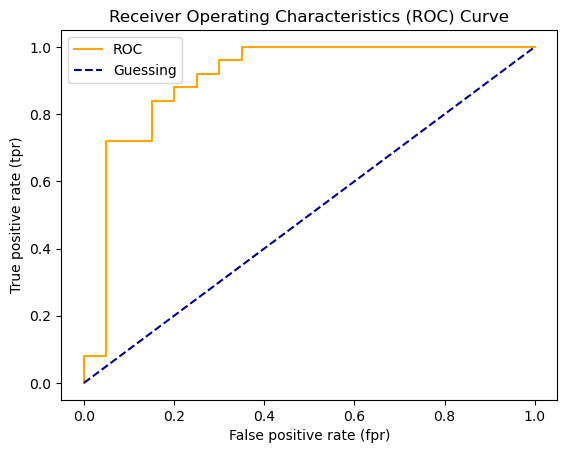

In [58]:
#curve visualization
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [59]:
#AUC metric
roc_auc_score(y_valid, y_probs_positive)

0.906

In [60]:
# 2. classification report
print(classification_report(y_valid, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.82      0.92      0.87        25

    accuracy                           0.84        45
   macro avg       0.85      0.83      0.84        45
weighted avg       0.85      0.84      0.84        45



In [61]:
# 3. confusion matrix (3 ways below)
# (method 1)
confusion_matrix(y_valid, y_preds)

array([[15,  5],
       [ 2, 23]], dtype=int64)

In [62]:
# (method 2) by using pandas
pd.crosstab(y_valid,
            y_preds,
            rownames = ["Actual Labels"],
            colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,15,5
1,2,23


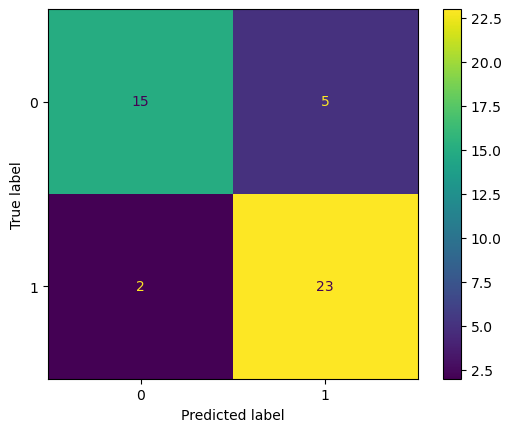

In [63]:
# (method 3) visualizing confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true = y_valid,
                                        y_pred = y_preds);

In [64]:
# 4. accuracy metric
accuracy_score(y_valid, y_preds)

0.8444444444444444

In [65]:
# 5. precision metric
precision_score(y_valid, y_preds)

0.8214285714285714

In [66]:
# 6. recall metric
recall_score(y_valid, y_preds)

0.92

In [67]:
# 7. f1_score
f1_score(y_valid, y_preds)

0.8679245283018868

#### -> feature importance

In [68]:
importances = clf_2.feature_importances_

In [69]:
features_dict = dict(zip(heart_disease.columns, importances))
features_dict

{'age': 0.09012154115019438,
 'sex': 0.02490195907904783,
 'cp': 0.11200352044246492,
 'trestbps': 0.07538295565782457,
 'chol': 0.08548160830295401,
 'fbs': 0.011620601086442243,
 'restecg': 0.021628663602619013,
 'thalach': 0.12866866029538804,
 'exang': 0.04244850658050187,
 'oldpeak': 0.1266722585396935,
 'slope': 0.07499035723284482,
 'ca': 0.12452920866177346,
 'thal': 0.08155015936825115}

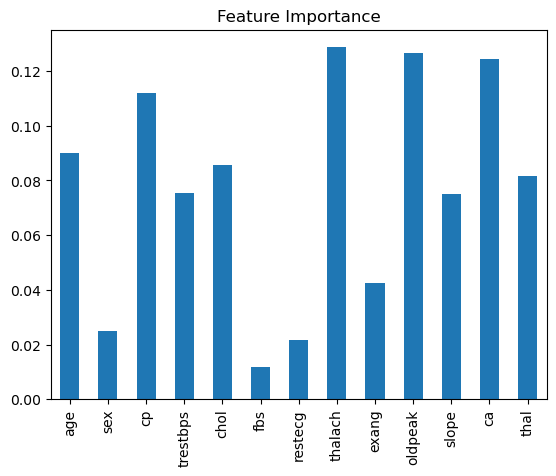

In [70]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

#### -> saving and reloading model (Optional)

In [71]:
#pickle.dump(clf, open("Heart Disease Diagnosis Model.pkl", "wb"))

In [72]:
#loaded_model = pickle.load(open("Heart Disease Diagnosis Model.pkl", "rb"))

In [73]:
#loaded_model.score(X_test, y_test)